In [27]:
import numpy as np

In [112]:
mu, sigma = 2, 1 # mean and standard deviation
np.random.seed(0)
A = np.random.normal(mu, sigma, size=(100,2))

In [113]:
X=A[:,0]
Y=A[:,1]

In [114]:
print(X)
print(Y)

[ 3.76405235  2.97873798  3.86755799  2.95008842  1.89678115  2.14404357
  2.76103773  2.44386323  3.49407907  2.3130677  -0.55298982  2.8644362
  4.26975462  2.04575852  3.53277921  2.15494743  1.11221425  1.65208785
  3.23029068  1.61267318  0.95144703  0.29372981  1.49034782  0.74720464
  0.38610215  1.10453344  1.48919486  1.97181777  2.06651722  1.36567791
  1.32753955  1.18685372  2.17742614  0.36980165  1.09270164  2.72909056
  3.13940068  2.40234164  1.12920285  1.68844747  0.83485016  2.46566244
  3.48825219  3.17877957  0.92924738  1.59682305  2.20827498  2.3563664
  2.01050002  2.12691209  3.8831507   0.729515    0.82687659  1.58638102
  3.92294203  3.86755896  1.13877431  1.73199663  2.94725197  2.61407937
  2.37642553  2.29823817  1.30543214  1.56484645  2.67229476  1.23008393
  1.32566734  1.36415392  2.57659082  2.39600671  0.50874241  2.1666735
  4.38314477  1.08717777  0.68409259  1.93175839  1.25524518  1.90154748
  3.12663592  0.85253135  1.50196755  2.94942081  0.77

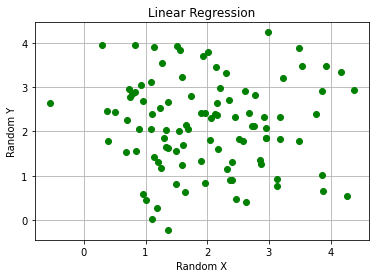

In [115]:
import matplotlib.pyplot as plt
plt.plot(X,Y,'go')
plt.ylabel('Random Y')
plt.xlabel('Random X')
plt.title('Linear Regression')
plt.grid()
plt.show()

In [116]:
def mean(values):
	return sum(values) / float(len(values))

def variance(values, mean):
	return sum([(x-mean)**2 for x in values])
 
def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar
 

In [117]:
#Now will calculate mean of x and y and will calculate variance and covariance
mean_x, mean_y = mean(X), mean(Y)
var_x, var_y = variance(X, mean_x), variance(Y, mean_y)
print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))
# Covariance
covar = covariance(X, mean_x, Y, mean_y)
print('Covariance:'+ str(covar))

x stats: mean=1.999 variance=104.440
y stats: mean=2.143 variance=103.188
Covariance:-2.4920293523629207


In [118]:
def coefficients(dataset):
	x = [row[0] for row in dataset]
	y = [row[1] for row in dataset]
	x_mean, y_mean = mean(x), mean(y)
	b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
	b0 = y_mean - b1 * x_mean
	return [b0, b1]
#when B0=0
def coefficientsB0(dataset):
	x = [row[0] for row in dataset]
	y = [row[1] for row in dataset]
	x_mean, y_mean = mean(x), mean(y)
	b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
	b0 = 0
	return [b0, b1]
#when B1=0
def coefficientsB1(dataset):
	x = [row[0] for row in dataset]
	y = [row[1] for row in dataset]
	x_mean, y_mean = mean(x), mean(y)
	b1 = 0
	b0 = y_mean - b1 * x_mean
	return [b0, b1]
b0, b1 = coefficients(A)
print(str(b0), str(b1))


2.190477652700939 -0.023860917890475692


In [119]:
from math import sqrt

#implementing the linear regression Algorithm
def SLR(dataset,b0,b1):
	predictions = list()
	for row in dataset:
		y = b0 + b1 * row[0]
		predictions.append(y)
	return predictions

# Calculating root mean squared error/Guassian Error
def rmse(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return sqrt(mean_error)

# Evaluating regression algorithm on training data
def train_data(dataset, algorithm):
	test_set = list()
	for row in dataset:
		row_value = list(row)
		test_set.append(row_value)
	predicted = algorithm(test_set,b0,b1)
	print(predicted)
	actual = Y
	rmse_ = rmse(actual, predicted)
	print(rmse_)
	return predicted


In [120]:
predicted=list()
predicted=train_data(A, SLR)

[2.100663908738352, 2.119402230244951, 2.0981941690613177, 2.1200858352007175, 2.145218713467383, 2.139318805095867, 2.124596758248701, 2.132164832768848, 2.107105718833496, 2.1352857341967355, 2.2036724972908255, 2.1221295757574463, 2.088597388205492, 2.141663976695868, 2.106182297941953, 2.139058629118093, 2.1639391997485244, 2.151057320148158, 2.113399952005726, 2.1519977903069383, 2.1677752531232684, 2.1834689898374573, 2.1549165857814656, 2.172648664139708, 2.1812649009441833, 2.1641224710102964, 2.1549440963655515, 2.143428270756347, 2.1411686549384004, 2.157891324313424, 2.1588013404489623, 2.162158233588796, 2.138522266308047, 2.1816538458221335, 2.164404788694699, 2.1253590468811487, 2.115568670741748, 2.133155576055931, 2.1635338361958767, 2.1501897463076487, 2.1705573616010203, 2.1316446836809004, 2.1072447535235104, 2.1146290543615773, 2.1683049573028623, 2.1523759889470475, 2.137786184769455, 2.1342525875780844, 2.1425052767877197, 2.1397275778966782, 2.0978221127621364, 2

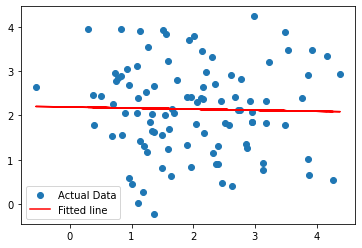

In [126]:
import matplotlib.pyplot as plt
plt.scatter(X, Y, label='Actual Data')
plt.plot(X, predicted, 'r', label='Fitted line')
plt.legend()
plt.show()

In [124]:
A=np.vstack([X,np.ones(len(X))]).T
b1, b0 = np.linalg.lstsq(A, Y, rcond=None)[0]
b0, b1

(2.190477652700939, -0.023860917890475508)

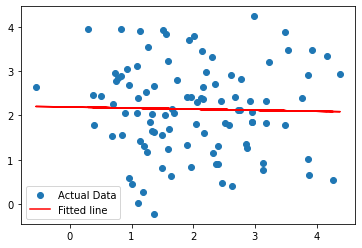

In [127]:
import matplotlib.pyplot as plt
plt.scatter(X, Y,label='Actual Data')
plt.plot(X, b1*X +b0, 'r', label='Fitted line')
plt.legend()
plt.show()